In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')

In [2]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

In [3]:
data.dtypes

survived       int64
pclass         int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body          object
home.dest     object
dtype: object

<AxesSubplot:xlabel='survived', ylabel='fare'>

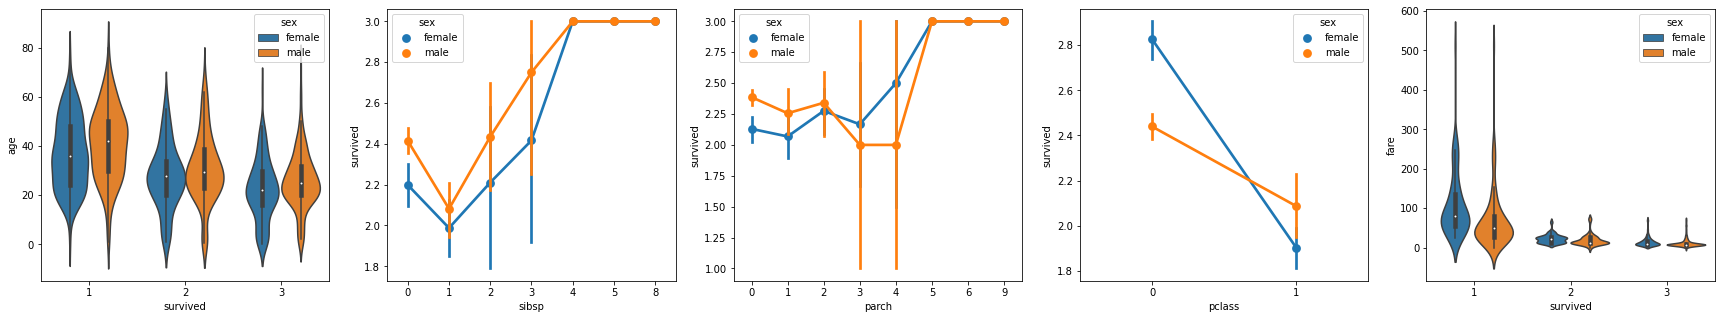

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [5]:
data.replace({'male': 1, 'female': 0}, inplace=True)

In [6]:
data.dtypes

survived       int64
pclass         int64
name          object
sex            int64
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body          object
home.dest     object
dtype: object

In [7]:
data.corr().abs()[["survived"]]

,survived
survived,1.000000
pclass,0.312469
sex,0.124617
age,0.408106
sibsp,0.060832
parch,0.018322
fare,0.558629


In [8]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
survived,1.000000
pclass,0.312469
sex,0.124617
age,0.408106
sibsp,0.060832
parch,0.018322
fare,0.558629
relatives,0.147393


In [9]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [13]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.6746411483253588


In [14]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

2022-05-15 22:25:55.303572: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-15 22:25:55.303712: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-15 22:26:18.376114: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-15 22:26:18.376162: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-15 22:26:18.376197: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mxp-PC): /proc/driver/nvidia/version does not exist
2022-05-15 22:26:18.386421: I tensorflow/core/platform/cpu_feature_gua

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 3s 5ms/step - loss: 0.6701 - accuracy: 0.2859
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6110 - accuracy: 0.2871
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 0.5210 - accuracy: 0.2871
Epoch 4/50
27/27 [==============================] - 0s 5ms/step - loss: 0.3757 - accuracy: 0.2871
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.1415 - accuracy: 0.2871
Epoch 6/50
27/27 [==============================] - 0s 4ms/step - loss: -0.2069 - accuracy: 0.2871
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: -0.6885 - accuracy: 0.2871
Epoch 8/50
27/27 [==============================] - 0s 4ms/step - loss: -1.3234 - accuracy: 0.2871
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: -2.1546 - accuracy: 0.2871
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: -3.2785 - accuracy: 0.2871
Epoch 11/50
27

In [17]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(metrics.accuracy_score(y_test, y_pred))

0.0
